In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
path = '/content/drive/MyDrive/shape_dataset'
os.listdir(path)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# =========================
# PARAMETER
# =========================
IMG_SIZE = (56, 56)
BATCH_SIZE = 20
EPOCHS = 100

TRAIN_DIR = r''+path+'/train224'   # folder data training
TEST_DIR  = r''+path+'/test224'

# =========================
# DATA GENERATOR (GRAYSCALE)
# =========================
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",     # ⬅️ konversi grayscale
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",     # ⬅️ konversi grayscale
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

NUM_CLASSES = train_generator.num_classes
print("Jumlah kelas:", NUM_CLASSES)

# =========================
# MODEL CNN (1 CHANNEL)
# =========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(56,56,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(NUM_CLASSES, activation='softmax')
])

# =========================
# COMPILE
# =========================
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# =========================
# CALLBACK
# =========================
checkpoint = ModelCheckpoint(
    "best_model_grayscale_no_aug.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=8,
    restore_best_weights=True
)

# =========================
# TRAINING
# =========================
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

print("Training selesai. Model terbaik disimpan.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 75 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Jumlah kelas: 5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 54, 54, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 25, 25, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 913,413 (3.48 MB)

 Trainable params: 913,413 (3.48 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.1664 - loss: 1.6809
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_model_grayscale_no_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - accuracy: 0.1571 - loss: 1.6842 - val_accuracy: 0.2000 - val_loss: 1.6095
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.1132 - loss: 1.6108
Epoch 2: val_accuracy did not improve from 0.20000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.1119 - loss: 1.6129 - val_accuracy: 0.2000 - val_loss: 1.6074
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.1221 - loss: 1.6333
Epoch 3: val_accuracy improved from 0.20000 to 0.28000, saving model to best_model_grayscale_no_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.1270 - loss: 1.6318 - val_accuracy: 0.2800 - val_loss: 1.6085
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1376 - loss: 1.6173
Epoch 4: val_accuracy did not improve from 0.28000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.1341 - loss: 1.6173 - val_accuracy: 0.2800 - val_loss: 1.6085
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3855 - loss: 1.6009
Epoch 5: val_accuracy did not improve from 0.28000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.3804 - loss: 1.6012 - val_accuracy: 0.2400 - val_loss: 1.6080
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2105 - loss: 1.6049
Epoch 6: val_accuracy improved from 0.28000 to 0.44000, saving model to best_model_grayscale_no_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - accuracy: 0.2110 - loss: 1.6054 - val_accuracy: 0.4400 - val_loss: 1.6071
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.2179 - loss: 1.6068
Epoch 7: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.2170 - loss: 1.6073 - val_accuracy: 0.2000 - val_loss: 1.6056
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2641 - loss: 1.6035
Epoch 8: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step - accuracy: 0.2566 - loss: 1.6038 - val_accuracy: 0.3200 - val_loss: 1.6046
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1700 - loss: 1.6163
Epoch 9: val_accuracy did not improve from 0.44000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - accuracy: 0.1707 - loss: 1.6154 - val_accuracy: 0.2000 - val_loss: 1.6019
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2517 - loss: 1.6005
Epoch 10: val_accuracy did not improve from 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - accuracy: 0.4562 - loss: 1.4487 - val_accuracy: 0.6000 - val_loss: 1.3439
Epoch 19/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.4946 - loss: 1.3545
Epoch 19: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.4863 - loss: 1.3523 - val_accuracy: 0.4800 - val_loss: 1.2460
Epoch 20/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.4348 - loss: 1.3197
Epoch 20: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.4412 - loss: 1.3095 - val_accuracy: 0.4000 - val_loss: 1.2640
Epoch 21/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.4929 - loss: 1.2130
Epoch 21: val_accuracy did not improve from 0.60000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - accuracy: 0.4903 - loss: 1.2106 - val_accuracy: 0.6000 - val_loss: 1.0700
Epoch 22/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.6320 - loss: 1.0466
Epoch 22: val_accuracy improved from 0.6

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.6309 - loss: 1.0510 - val_accuracy: 0.6400 - val_loss: 1.0482
Epoch 23/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.6233 - loss: 0.9687
Epoch 23: val_accuracy did not improve from 0.64000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.6240 - loss: 0.9647 - val_accuracy: 0.4800 - val_loss: 1.1574
Epoch 24/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7542 - loss: 0.7999
Epoch 24: val_accuracy did not improve from 0.64000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step - accuracy: 0.7500 - loss: 0.8093 - val_accuracy: 0.6000 - val_loss: 1.0667
Epoch 25/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.6598 - loss: 0.8345
Epoch 25: val_accuracy improved from 0.64000 to 0.72000, saving model to best_model_grayscale_no_aug.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - accuracy: 0.6612 - loss: 0.8359 - val_accuracy: 0.7200 - val_loss: 1.0110
Epoch 26/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7655 - loss: 0.7710
Epoch 26: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7617 - loss: 0.7726 - val_accuracy: 0.5600 - val_loss: 1.0897
Epoch 27/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7168 - loss: 0.7266
Epoch 27: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.7201 - loss: 0.7225 - val_accuracy: 0.6400 - val_loss: 1.0711
Epoch 28/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.7454 - loss: 0.6424
Epoch 28: val_accuracy did not improve from 0.72000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - accuracy: 0.7510 - loss: 0.6387 - val_accuracy: 0.6400 - val_loss: 1.0277
Epoch 29/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7285 - loss: 0.7208
Epoch 29: val_accuracy did not improve f

In [ ]:
import shutil

src = "/content/best_model_grayscale_no_aug.h5"
dst = "/content/drive/MyDrive/shape_dataset/best_model_grayscale_no_aug.h5"

shutil.copy(src, dst)

print("Model berhasil disalin ke Google Drive")

Model berhasil disalin ke Google Drive


In [ ]:
from tensorflow.keras.models import load_model

MODEL_PATH = "/content/drive/MyDrive/shape_dataset/best_model_grayscale_no_aug_72.h5"

val_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    color_mode="grayscale",     # ⬅️ konversi grayscale
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

model = load_model(MODEL_PATH)
print("Model berhasil dimuat")

import numpy as np

y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_generator.classes

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true, y_pred)
print("Test Accuracy:", acc)

Found 25 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Model berhasil dimuat
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Test Accuracy: 0.72


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Jumlah BENAR : 18
Jumlah SALAH : 7

Contoh BENAR:


,filename,true_label,pred_label,status
0,ling_16.jpg,Lingkaran,Lingkaran,BENAR
1,ling_17.jpg,Lingkaran,Lingkaran,BENAR
2,ling_18.jpg,Lingkaran,Lingkaran,BENAR
3,ling_19.jpg,Lingkaran,Lingkaran,BENAR
4,ling_20.jpg,Lingkaran,Lingkaran,BENAR



Contoh SALAH:


,filename,true_label,pred_label,status
8,perseg_19.jpg,Persegi,PersegiPanjang,SALAH
13,PPanj_19.jpg,PersegiPanjang,Persegi,SALAH
16,Seg_17.jpg,Segitiga,PersegiPanjang,SALAH
18,Seg_19.jpg,Segitiga,PersegiPanjang,SALAH
19,Seg_20.jpg,Segitiga,PersegiPanjang,SALAH


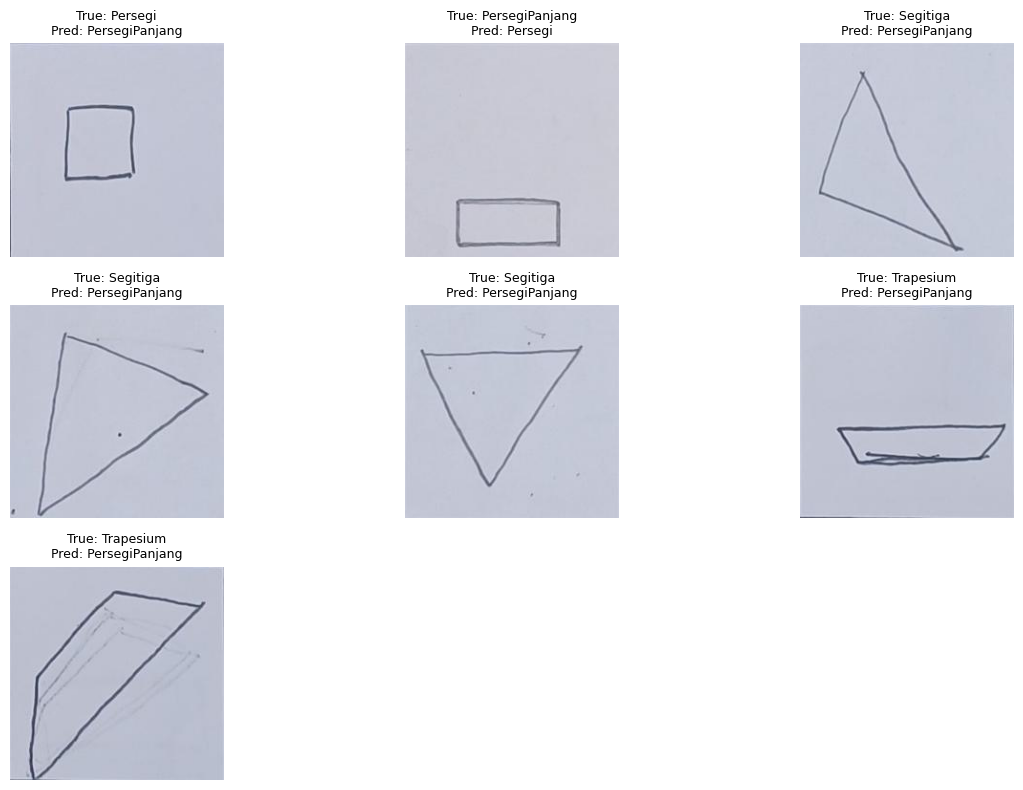

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# =========================
# LOAD MODEL
# =========================
model = load_model("/content/drive/MyDrive/shape_dataset/best_model_grayscale_no_aug_72.h5")

# =========================
# PREDIKSI DATA TEST
# =========================
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_generator.classes

filepaths = val_generator.filepaths
labels = list(val_generator.class_indices.keys())

# =========================
# BUAT DATAFRAME HASIL
# =========================
results_df = pd.DataFrame({
    "filename": [os.path.basename(f) for f in filepaths],
    "true_label": [labels[i] for i in y_true],
    "pred_label": [labels[i] for i in y_pred]
})

results_df["status"] = np.where(
    results_df["true_label"] == results_df["pred_label"],
    "BENAR",
    "SALAH"
)

# =========================
# TAMPILKAN RINGKASAN
# =========================
print("Jumlah BENAR :", (results_df["status"] == "BENAR").sum())
print("Jumlah SALAH :", (results_df["status"] == "SALAH").sum())

print("\nContoh BENAR:")
display(results_df[results_df["status"] == "BENAR"].head(5))

print("\nContoh SALAH:")
display(results_df[results_df["status"] == "SALAH"].head(5))

# =========================
# SIMPAN KE CSV (OPSIONAL)
# =========================
results_df.to_csv(
    "/content/drive/MyDrive/shape_dataset/hasil_prediksi_test.csv",
    index=False
)

# =========================
# VISUALISASI GAMBAR SALAH
# =========================
wrong = results_df[results_df["status"] == "SALAH"]

plt.figure(figsize=(12,8))
for i, idx in enumerate(wrong.index[:9]):
    img = plt.imread(filepaths[idx])
    plt.subplot(3,3,i+1)
    plt.imshow(img, cmap="gray")
    plt.title(
        f"True: {wrong.loc[idx,'true_label']}\nPred: {wrong.loc[idx,'pred_label']}",
        fontsize=9
    )
    plt.axis("off")

plt.tight_layout()
plt.show()


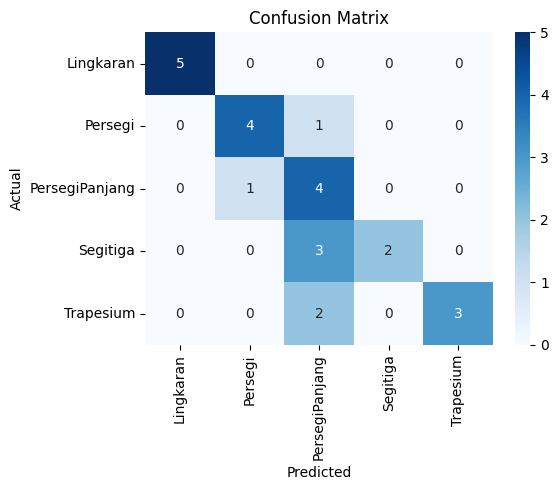

=== METRIK GLOBAL (MACRO) ===
Accuracy : 0.7200
Precision: 0.8400
Recall   : 0.7200
F1-score : 0.7310

=== CLASSIFICATION REPORT ===
                precision    recall  f1-score   support

     Lingkaran     1.0000    1.0000    1.0000         5
       Persegi     0.8000    0.8000    0.8000         5
PersegiPanjang     0.4000    0.8000    0.5333         5
      Segitiga     1.0000    0.4000    0.5714         5
     Trapesium     1.0000    0.6000    0.7500         5

      accuracy                         0.7200        25
     macro avg     0.8400    0.7200    0.7310        25
  weighted avg     0.8400    0.7200    0.7310        25



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_recall_fscore_support
)

# =========================
# CONFUSION MATRIX
# =========================
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# =========================
# METRIK UTAMA
# =========================
accuracy = accuracy_score(y_true, y_pred)

precision, recall, f1, _ = precision_recall_fscore_support(
    y_true,
    y_pred,
    average='macro'   # ⬅️ adil untuk multi-class
)

print("=== METRIK GLOBAL (MACRO) ===")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# =========================
# DETAIL PER KELAS
# =========================
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(
    y_true,
    y_pred,
    target_names=labels,
    digits=4
))
